In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error, mean_squared_log_error, 
mean_absolute_error, mean_absolute_percentage_error, r2_score)
import plotly.graph_objects as go
import plotly.express as px
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/MSI (1962-2023).csv
/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/Intel (1980-2023).csv
/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/ASUS (2000-2023).csv
/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/NVIDIA (1999-2023).csv
/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/AMD (1980-2023).csv


# loading Data 

In [2]:
amd_df = pd.read_csv("/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/AMD (1980-2023).csv")
asus_df = pd.read_csv("/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/ASUS (2000-2023).csv")
intel_df = pd.read_csv("/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/Intel (1980-2023).csv")
msi_df = pd.read_csv("/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/MSI (1962-2023).csv")
nvidia_df = pd.read_csv("/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/NVIDIA (1999-2023).csv")

# Data information

In [3]:
amd_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.000000,3.125000,2.937500,3.031250,3.031250,727200
1,1980-03-19,0.000000,3.083333,3.020833,3.041667,3.041667,295200
2,1980-03-20,0.000000,3.062500,3.010417,3.010417,3.010417,159600
3,1980-03-21,0.000000,3.020833,2.906250,2.916667,2.916667,130800
4,1980-03-24,0.000000,2.916667,2.635417,2.666667,2.666667,436800
...,...,...,...,...,...,...,...
10854,2023-04-05,94.349998,94.500000,91.360001,92.559998,92.559998,52979300
10855,2023-04-06,91.470001,92.910004,90.620003,92.470001,92.470001,47778400
10856,2023-04-10,91.320000,95.800003,91.019997,95.480003,95.480003,52536300
10857,2023-04-11,96.059998,96.070000,92.690002,94.029999,94.029999,51935800


In [4]:
amd_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,1.085900e+04
mean,16.350958,17.010710,16.280518,16.648080,16.648080,1.819320e+07
std,22.396174,22.668726,21.705814,22.196357,22.196357,2.794779e+07
min,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,4.937500,5.405000,5.120000,5.265000,5.265000,1.216500e+06
50%,9.810000,10.000000,9.562500,9.760000,9.760000,6.745600e+06
75%,16.000000,16.250000,15.687500,16.000000,16.000000,2.242935e+07
max,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08


In [5]:
print(amd_df.isnull().sum(), asus_df.isnull().sum(), intel_df.isnull().sum(), 
msi_df.isnull().sum(), nvidia_df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64 Date           0
Open         123
High         123
Low          123
Close        123
Adj Close    123
Volume       123
dtype: int64 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# cleaning da data

In [6]:
asus_df.isnull().sum()

Date           0
Open         123
High         123
Low          123
Close        123
Adj Close    123
Volume       123
dtype: int64

In [7]:
open_asus_mean = asus_df['Open'].mean()
high_asus_mean = asus_df['High'].mean()
low_asus_mean = asus_df['Low'].mean()
close_asus_mean = asus_df['Close'].mean()
adjclose_asus_mean = asus_df['Adj Close'].mean()
volume_asus_mean = asus_df['Volume'].mean()
values = {'Open': open_asus_mean, 
          'High':high_asus_mean,
          'Low': low_asus_mean,
          'Close': close_asus_mean,
          'Adj Close': adjclose_asus_mean,
          'Volume': volume_asus_mean,}

asus_df.fillna(value=values, inplace=True)

In [8]:
asus_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Train test split

In [9]:
x_col = ['Open', 'High', 'Low', 'Volume']

# X datas
amd_X = amd_df[x_col].values
asus_X = asus_df[x_col].values
intel_X = intel_df[x_col].values
msi_X = msi_df[x_col].values
nvidia_X = nvidia_df[x_col].values

# y Datas
amd_y = amd_df['Close'].values
asus_y = asus_df['Close'].values
intel_y = intel_df['Close'].values
msi_y = msi_df['Close'].values
nvidia_y = nvidia_df['Close'].values

In [10]:
X_train_amd,X_test_amd, y_train_amd, y_test_amd = train_test_split(amd_X, amd_y, test_size = 0.2, random_state=0)
X_train_asus,X_test_asus, y_train_asus, y_test_asus = train_test_split(asus_X, asus_y, test_size = 0.2, random_state=0)
X_train_intel, X_test_intel, y_train_intel, y_test_intel = train_test_split(intel_X, intel_y, test_size = 0.2, random_state=0)
X_train_msi,X_test_msi, y_train_msi, y_test_msi = train_test_split(msi_X, msi_y, test_size = 0.2, random_state=0)
X_train_nvidia, X_test_nvidia, y_train_nvidia, y_test_nvidia = train_test_split(nvidia_X, nvidia_y, test_size = 0.2, random_state=0)

# Function test predictions

In [11]:
def perform(y_test, y_pred):
    print("MSE",round(mean_squared_error(y_test,y_pred), 3))
    print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
    print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
    print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3),'%')
    print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

# Scaled datas

In [12]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_amd_scaled = X_scaler.fit_transform(X_train_amd)
y_train_amd_scaled = y_scaler.fit_transform(y_train_amd.reshape(-1,1))

X_test_amd_scaled = X_scaler.transform(X_test_amd)
y_test_amd_scaled = y_scaler.transform(y_test_amd.reshape(-1,1))


In [13]:
X_train_asus_scaled = X_scaler.fit_transform(X_train_asus)
y_train_asus_scaled = y_scaler.fit_transform(y_train_asus.reshape(-1,1))

X_test_asus_scaled = X_scaler.transform(X_test_asus)
y_test_asus_scaled = y_scaler.transform(y_test_asus.reshape(-1,1))

In [14]:
X_train_intel_scaled = X_scaler.fit_transform(X_train_intel)
y_train_intel_scaled = y_scaler.fit_transform(y_train_intel.reshape(-1,1))

X_test_intel_scaled = X_scaler.transform(X_test_intel)
y_test_intel_scaled = y_scaler.transform(y_test_intel.reshape(-1,1))

In [15]:
X_train_msi_scaled = X_scaler.fit_transform(X_train_msi)
y_train_msi_scaled = y_scaler.fit_transform(y_train_msi.reshape(-1,1))

X_test_msi_scaled = X_scaler.transform(X_test_msi)
y_test_msi_scaled = y_scaler.transform(y_test_msi.reshape(-1,1))

In [16]:
X_train_nvidia_scaled = X_scaler.fit_transform(X_train_nvidia)
y_train_nvidia_scaled = y_scaler.fit_transform(y_train_nvidia.reshape(-1,1))

X_test_nvidia_scaled = X_scaler.transform(X_test_nvidia)
y_test_nvidia_scaled = y_scaler.transform(y_test_nvidia.reshape(-1,1))

# AMD Regressor

In [17]:
neural_amd = MLPRegressor(max_iter = 1000, hidden_layer_sizes=(15,15), tol=0.0000000100)
neural_amd.fit(X_train_amd_scaled, y_train_amd_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(15, 15), max_iter=1000, tol=1e-08)

In [18]:
predict_amd = neural_amd.predict(X_test_amd_scaled)
predict_amd

array([-0.5882813 , -0.4780752 , -0.53606982, ...,  2.91410643,
       -0.46713377,  3.40421371])

In [19]:
X_test_amd_inverse = X_scaler.inverse_transform(X_test_amd_scaled)
y_test_amd_inverse = y_scaler.inverse_transform(y_test_amd_scaled)
predict_amd_inverse = y_scaler.inverse_transform(predict_amd.reshape(-1,1))

In [20]:
perform(y_test_amd_inverse, predict_amd_inverse)

MSE 1.841
RMSE 1.357
MAE 0.67
MAPE 0.164 %
R2 Score :  0.999


# Asus Regressor

In [21]:
neural_asus = MLPRegressor(max_iter = 2000, hidden_layer_sizes=(20, 20), tol=0.00000000100)
neural_asus.fit(X_train_asus_scaled, y_train_asus_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=2000, tol=1e-09)

In [22]:
predict_asus = neural_asus.predict(X_test_asus_scaled)
predict_asus

array([-1.10159596,  1.09765934,  1.68155668, ...,  1.29765253,
       -0.11834533, -1.18665051])

In [23]:
y_test_asus_inverse = y_scaler.inverse_transform(y_test_asus_scaled)
predict_asus_inverse = y_scaler.inverse_transform(predict_asus.reshape(-1,1))

In [24]:
perform(y_test_asus_inverse, predict_asus_inverse)

MSE 3.682
RMSE 1.919
MAE 1.356
MAPE 0.095 %
R2 Score :  0.999


# Intel Regressor

In [25]:
neural_intel = MLPRegressor(max_iter = 1000, hidden_layer_sizes=(15,15), tol=0.0000000100)
neural_intel.fit(X_train_intel_scaled, y_train_intel_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(15, 15), max_iter=1000, tol=1e-08)

In [26]:
predict_intel = neural_intel.predict(X_test_intel_scaled)
predict_intel

array([ 0.80733903, -1.06629026, -1.09807017, ...,  1.73943596,
       -1.05056533,  1.71615784])

In [27]:
y_test_intel_inverse = y_scaler.inverse_transform(y_test_intel_scaled)
predict_intel_inverse = y_scaler.inverse_transform(predict_intel.reshape(-1,1))

In [28]:
perform(y_test_intel_inverse, predict_intel_inverse)

MSE 0.959
RMSE 0.98
MAE 0.575
MAPE 0.014 %
R2 Score :  1.0


# MSI Regressor

In [29]:
neural_msi = MLPRegressor(max_iter = 1000, hidden_layer_sizes=(15,15), tol=0.0000000100)
neural_msi.fit(X_train_msi_scaled, y_train_msi_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(15, 15), max_iter=1000, tol=1e-08)

In [30]:
predict_msi = neural_msi.predict(X_test_msi_scaled)
predict_msi

array([-0.62947718, -0.51882047,  2.53377786, ...,  0.38948091,
        0.6406455 , -0.59516573])

In [31]:
y_test_msi_inverse = y_scaler.inverse_transform(y_test_msi_scaled)
predict_msi_inverse = y_scaler.inverse_transform(predict_msi.reshape(-1,1))

In [32]:
perform(y_test_msi_inverse, predict_msi_inverse)

MSE 0.375
RMSE 0.612
MAE 0.317
MAPE 0.034 %
R2 Score :  1.0


# Nvidia Regressor

In [33]:
neural_nvidia = MLPRegressor(max_iter = 1000, hidden_layer_sizes=(20,20), tol=0.0000000100)
neural_nvidia.fit(X_train_nvidia_scaled, y_train_nvidia_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=1000, tol=1e-08)

In [34]:
predict_nvidia = neural_nvidia.predict(X_test_nvidia_scaled)
predict_nvidia

array([-0.50622575, -0.49750029, -0.46233526, ..., -0.48358903,
        0.52161313,  2.12577544])

In [35]:
y_test_nvidia_inverse = y_scaler.inverse_transform(y_test_nvidia_scaled)
predict_nvidia_inverse = y_scaler.inverse_transform(predict_nvidia.reshape(-1,1))

In [36]:
perform(y_test_nvidia_inverse, predict_nvidia_inverse)

MSE 1.991
RMSE 1.411
MAE 0.453
MAPE 0.029 %
R2 Score :  0.999


In [37]:
predict_nvidia_inverse.shape, y_test_amd_inverse.ravel().shape

((1219, 1), (2172,))

# AMD Scatters

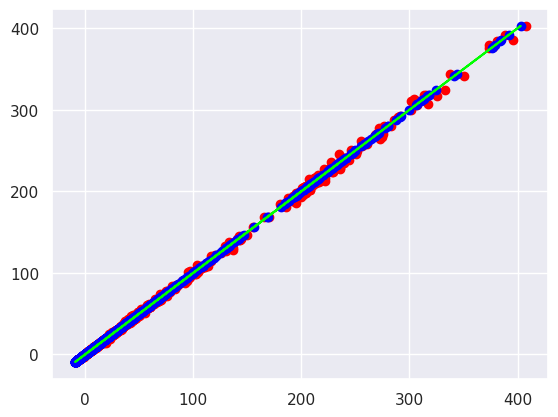

In [38]:
sns.set()

plt.scatter(predict_amd_inverse, y_test_amd_inverse, color='red', marker='o')
plt.scatter(y_test_amd_inverse, y_test_amd_inverse, color='blue')
plt.plot(y_test_amd_inverse, y_test_amd_inverse, color='lime')

In [39]:
grafico1 = px.scatter(x = predict_amd_inverse.ravel(), y = y_test_amd_inverse.ravel())
grafico2 = px.scatter(x = y_test_amd_inverse.ravel(), y = y_test_amd_inverse.ravel())
grafico3 = go.Figure(data= grafico1.data + grafico2.data)
grafico3.show()

# Asus Scatters

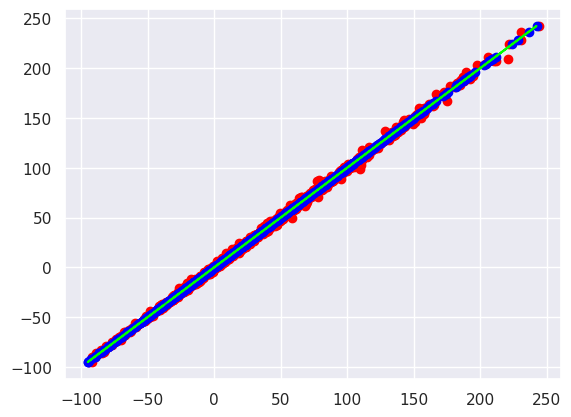

In [40]:
sns.set()

plt.scatter(predict_asus_inverse, y_test_asus_inverse, color='red', marker='o')
plt.scatter(y_test_asus_inverse, y_test_asus_inverse, color='blue')
plt.plot(y_test_asus_inverse, y_test_asus_inverse, color='lime')

In [44]:
grafico1 = px.scatter(x = predict_asus_inverse.ravel(), y = y_test_asus_inverse.ravel())
grafico2 = px.scatter(x = y_test_asus_inverse.ravel(), y = y_test_asus_inverse.ravel())
grafico3 = go.Figure(data= grafico1.data + grafico2.data)
grafico3.show()

# Intel Scatters

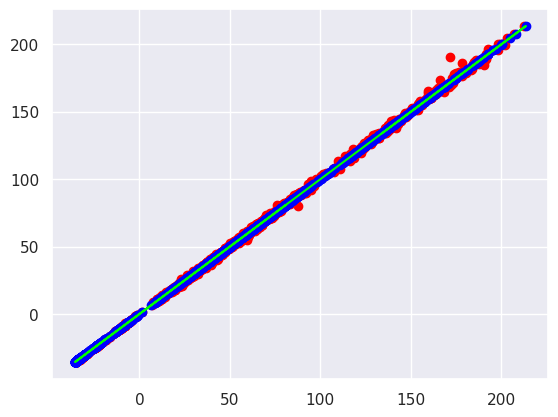

In [41]:
sns.set()

plt.scatter(predict_intel_inverse, y_test_intel_inverse, color='red', marker='o')
plt.scatter(y_test_intel_inverse, y_test_intel_inverse, color='blue')
plt.plot(y_test_intel_inverse, y_test_intel_inverse, color='lime')

In [45]:
grafico1 = px.scatter(x = predict_intel_inverse.ravel(), y = y_test_intel_inverse.ravel())
grafico2 = px.scatter(x = y_test_intel_inverse.ravel(), y = y_test_intel_inverse.ravel())
grafico3 = go.Figure(data= grafico1.data + grafico2.data)
grafico3.show()

# MSI Scatters

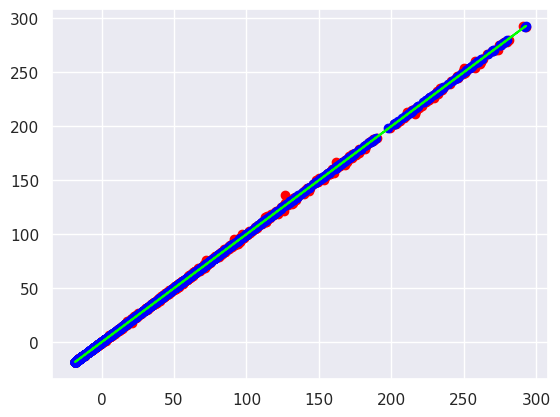

In [42]:
sns.set()

plt.scatter(predict_msi_inverse, y_test_msi_inverse, color='red', marker='o')
plt.scatter(y_test_msi_inverse, y_test_msi_inverse, color='blue')
plt.plot(y_test_msi_inverse, y_test_msi_inverse, color='lime')

In [46]:
grafico1 = px.scatter(x = predict_msi_inverse.ravel(), y = y_test_msi_inverse.ravel())
grafico2 = px.scatter(x = y_test_msi_inverse.ravel(), y = y_test_msi_inverse.ravel())
grafico3 = go.Figure(data= grafico1.data + grafico2.data)
grafico3.show()

# Nvidia Scatters

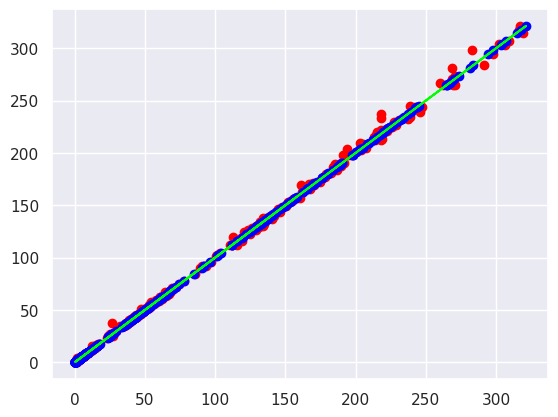

In [43]:
sns.set()

plt.scatter(predict_nvidia_inverse, y_test_nvidia_inverse, color='red', marker='o')
plt.scatter(y_test_nvidia_inverse, y_test_nvidia_inverse, color='blue')
plt.plot(y_test_nvidia_inverse, y_test_nvidia_inverse, color='lime')

In [47]:
grafico1 = px.scatter(x = predict_nvidia_inverse.ravel(), y = y_test_nvidia_inverse.ravel())
grafico2 = px.scatter(x = y_test_nvidia_inverse.ravel(), y = y_test_nvidia_inverse.ravel())
grafico3 = go.Figure(data= grafico1.data + grafico2.data)
grafico3.show()